__Plot GERMAINE FDFD data__

Daniel Köhn 
Kiel, 07/08/2017

__Import Libraries__

In [68]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
import pickle

__FDFD data dimensions__

In [69]:
NSRC = 40   # number of sources
NF = 1       # number of frequencies
NREC = 117   # number of receivers
clip = 2.5e-1 
clip1 = 1e-2

__Define fonts__

In [70]:
FSize = 30
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 20, 12

__Read FDFD data__

In [71]:
name_FDFD = "seis/2_cross_TE_p_stage_1.bin"
f = open (name_FDFD)
data_type = np.dtype ('float32').newbyteorder ('<')
data_FDFD = np.fromfile(f, dtype=data_type)
data_FDFD = data_FDFD.reshape(NF*NSRC,2*NREC)
data_FDFD = np.transpose(data_FDFD)
data_FDFD = np.flipud(data_FDFD)

In [72]:
name_FDFD = "seis/2_cross_TE_p_stage_7.bin"
f = open (name_FDFD)
data_type = np.dtype ('float32').newbyteorder ('<')
data_FDFD1 = np.fromfile(f, dtype=data_type)
data_FDFD1 = data_FDFD1.reshape(NF*NSRC,2*NREC)
data_FDFD1 = np.transpose(data_FDFD1)
data_FDFD1 = np.flipud(data_FDFD1)

__Define Axis__

In [73]:
#x = np.arange(0.0, DH*NX, DH)
#y = np.arange(0.0, DH*NY, DH)
#x = np.divide(x,1000.0);
#y = np.divide(y,1000.0);

__Define SubPlot__

In [74]:
def do_plot(i, model, cm, title, vpmin, vpmax, n):
    
    ax=plt.subplot(1, 2, i)
    
    #ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    #ax.set_yticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5])
    
    #plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    ## for Palatino and other serif fonts use:
    #rc('font',**{'family':'serif','serif':['Palatino']})
    #plt.rc('text', usetex=True)
    rc('text', usetex=True)
    
    # plt.pcolor(x, y, vp, cmap=cm, vmin=vpmin)
    NSRC1 = 0 + (n-1) * NSRC
    NSRC2 = NSRC - 1 + (n-1) * NSRC
    plt.imshow(model[0:2*NREC-1:2,NSRC1:NSRC2], cmap=cm, interpolation='none', extent=[1,NSRC,1,NREC], vmin=vpmin, vmax=vpmax, aspect='auto')
    a = gca()
    #a.set_xticklabels(a.get_xticks(), font)
    #a.set_yticklabels(a.get_yticks(), font)
    #plt.axis('scaled')
    if(i==1):
        plt.ylabel('Receiver no.', fontdict=font)
    plt.xlabel('Source no.', fontdict=font)
    plt.title(title, fontdict=font)
    plt.gca().invert_yaxis()
    if(i==2):
        ax.set_yticks([])
#    cbar=plt.colorbar(aspect=8, pad=0.02)
#    cbar.set_label(title, fontdict=font, labelpad=10)
#    plt.text(0.1, 0.4,an,fontdict=font,color='white')

__Plot SubPlots__

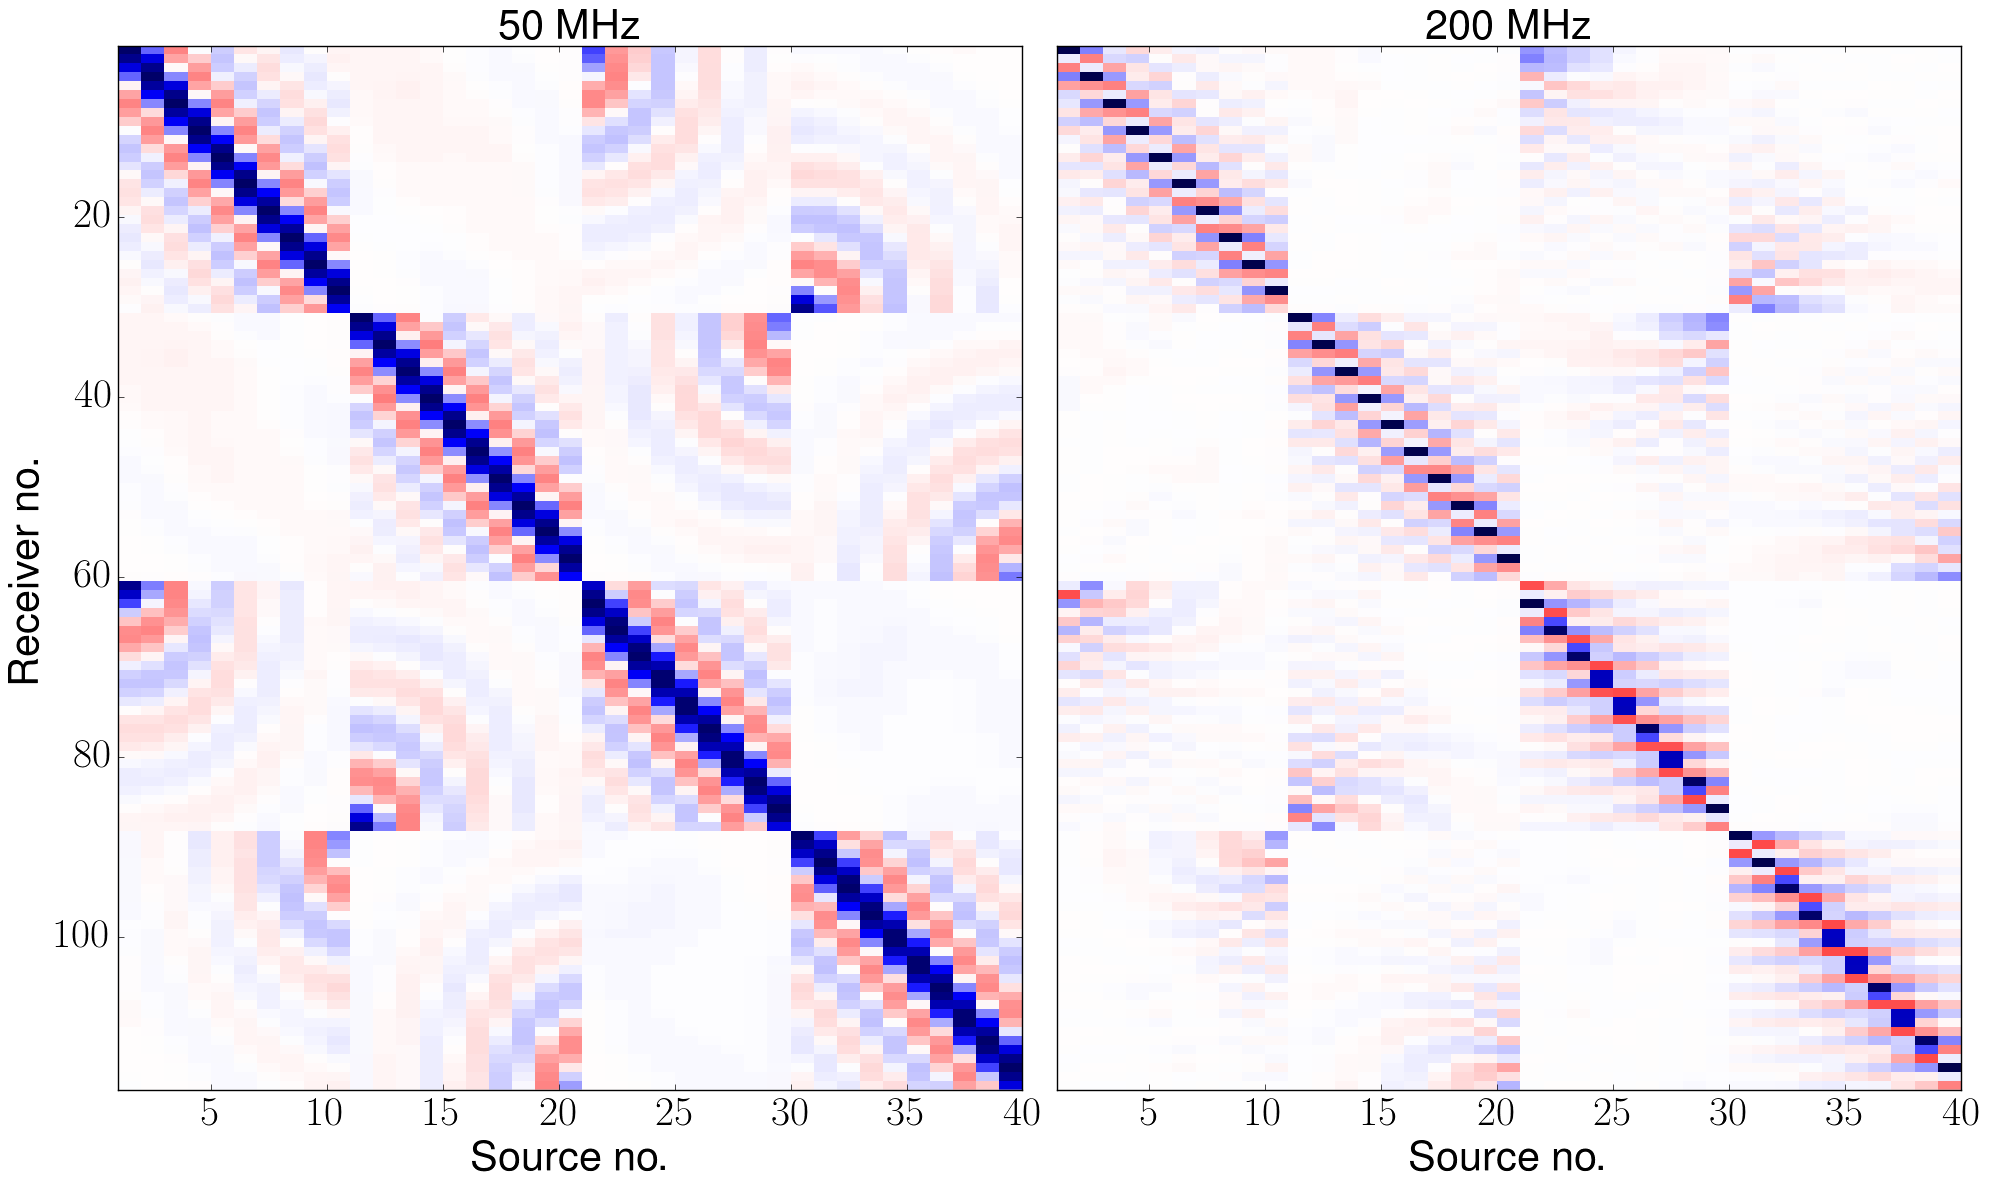

In [75]:
plt.close('all')
plt.figure()
do_plot(1, data_FDFD, 'seismic', '50 MHz', -clip, clip, 1)
do_plot(2, data_FDFD1, 'seismic', '200 MHz', -clip, clip, 1)
plt.tight_layout()
plt.savefig('test.pdf', bbox_inches='tight', format='pdf')
#plt.savefig('test.png', bbox_inches='tight', format='png')
plt.show()